In [1]:
import pandas as pd
from datetime import timedelta
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty




def clusterInfo(model):
  print("Cluster Analysis Inertia: ", model.inertia_)
  print('------------------------------------------')
  for i in range(len(model.cluster_centers_)):
    print("\n  Cluster ", i)
    print("    Centroid ", model.cluster_centers_[i])
    print("    #Samples ", (model.labels_==i).sum()) # NumPy Power


def clusterWithFewestSamples(model):
 
  minSamples = len(model.labels_)
  minCluster = 0
  for i in range(len(model.cluster_centers_)):
    if minSamples > (model.labels_==i).sum():
      minCluster = i
      minSamples = (model.labels_==i).sum()
  print("\n  Cluster With Fewest Samples: ", minCluster)
  return (model.labels_==minCluster)


def doKMeans(data, clusters=0):
 
  df1 = pd.concat([data.TowerLon, data.TowerLat], axis = 1)
  kmeans = KMeans(n_clusters = clusters)
  labels = kmeans.fit_predict(df1)
  
  centroids = kmeans.cluster_centers_
  ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x', s = 100)
  model = kmeans
  return model

In [2]:
df = pd.read_csv('F:\\CSV files\\CDR.csv')
print(df.head())
df.CallDate = pd.to_datetime(df.CallDate)
df.Duration = pd.to_timedelta(df.Duration)
df.CallTime = pd.to_timedelta(df.CallTime)
print(df.dtypes)
print(df[(df.TowerLat == 32.721986) & (df.TowerLon == -96.890587)]) #the data for second question (post office Lon/Lat))

           In         Out Direction    CallDate         CallTime  DOW  \
0  4638472273  2666307251  Incoming  2010-12-25  07:16:24.736813  Sat   
1  4638472273  1755442610  Incoming  2010-12-25  21:18:30.053710  Sat   
2  4638472273  5481755331  Incoming  2010-12-25  14:52:42.878016  Sat   
3  4638472273  1755442610  Incoming  2010-12-25  16:02:09.001913  Sat   
4  4638472273  2145623768  Incoming  2010-12-25  15:28:35.028554  Sat   

         Duration                               TowerID   TowerLat   TowerLon  
0  0:02:41.741499  0db53dd3-eb9c-4344-abc5-c2d74ebc3eec  32.731611 -96.709417  
1  0:02:47.108750  aeaf8b43-8034-44fe-833d-31854a75acbf  32.731722 -96.709500  
2  0:04:35.356341  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944 -96.910389  
3  0:02:23.498499  fadaa83f-6001-45fd-aa4a-17d6c6b7ec00  32.899944 -96.910389  
4  0:03:54.692497  95d7920d-c3cd-4d20-a568-9a55800dc807  32.899944 -96.910389  
In                     int64
Out                    int64
Direction             o

In [3]:
users = df.In.unique()
print(users)

[4638472273 1559410755 4931532174 2419930464 1884182865 3688089071
 4555003213 2068627935 2894365987 8549533077]


In [4]:
print("\n\nExamining person: ",6)
user1 = df[(df.In == users[ 6])]



Examining person:  6


In [9]:
user1 = user1[(user1.DOW == 'Mon') | (user1.DOW == 'Tue') | (user1.DOW == 'Wed') | (user1.DOW == 'Thu') | (user1.DOW == 'Fri')]


user1 = user1[(user1.CallTime < "17:00:00")]



  Cluster With Fewest Samples:  2
    Its Waypoint Time:  0 days 08:04:09.204236


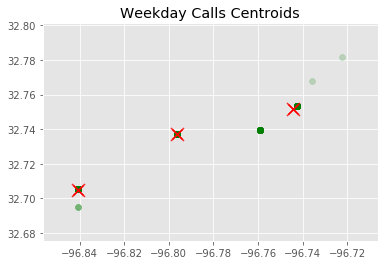

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekday Calls before 5PM')



model = doKMeans(user1, 3)


midWayClusterIndices = clusterWithFewestSamples(model)
midWaySamples = user1[midWayClusterIndices]
print("    Its Waypoint Time: ", midWaySamples.CallTime.mean())


ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=169, c='r', marker='x', alpha=0.8, linewidths=2)
ax.set_title('Weekday Calls Centroids')
plt.show() 